#**Top 250 Movies - IMDb Rating**

In [4]:
import requests 
import pandas as pd
from bs4 import BeautifulSoup
import missingno as msno
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt



<Response [200]>


In [5]:
url="https://www.imdb.com/chart/top/?ref_=nv_mv_250"

r=requests.get(url)
print(r)
soup=BeautifulSoup(r.text,'html.parser')


<Response [200]>


In [6]:

name=[]
year=[]

nav=soup.find_all('td','titleColumn')
for item in nav:
  x=item.find('a').text
  y=item.find('span').text
  y=y.replace("(","")
  y=y.replace(")","")
  name.append(x)
  year.append(int(y))  
# print(name[:5])
# print(type(year[0]))


In [7]:

rating=[]
nav=soup.find_all('td',"imdbRating" )
for item in nav:
  y=item.get_text()
  y=y.replace("\n",'')
  rating.append(float(y))


In [10]:
df1 = pd.DataFrame(name, columns = ['Name'])
df2 = pd.DataFrame(rating, columns = ['Rating'])


df1["Rating"]=df2
df1["Year"]=year
df1.index=range(1,251) #To Start From 1
# print(df1.describe())

df1.to_csv('Akshay_IMDb_Scraping.csv')


# Visualisation of Scraped Data

In [14]:
df5=pd.read_csv('Akshay_IMDb_Scraping.csv')
print(df5.shape)
%matplotlib inline
df5.columns=df5.columns.str.replace('Unnamed: 0','Sr.No')
# print(df5.head())
# print(df5.columns)

# print(df5.info()) # 3 Data types

# print(df5.describe())

# print(df5.isnull().sum()) #NO NUll Values

# print(df5['Rating'].value_counts())


(250, 4)


### Bar Graph of Rating values vs Count of Rating

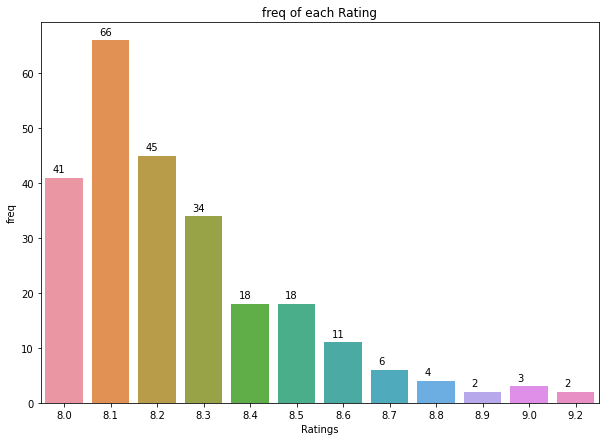

In [17]:
plt.figure(figsize=(10,7))
ax=sb.countplot(data=df5 , x='Rating')
plt.ylabel('freq')
plt.xlabel('Ratings')
plt.title('freq of each Rating')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15,p.get_height()+1))

# plt.savefig('Rating_bar_graph.svg')
# plt.show()

###Bar Graph for all Colums

<Figure size 720x720 with 0 Axes>

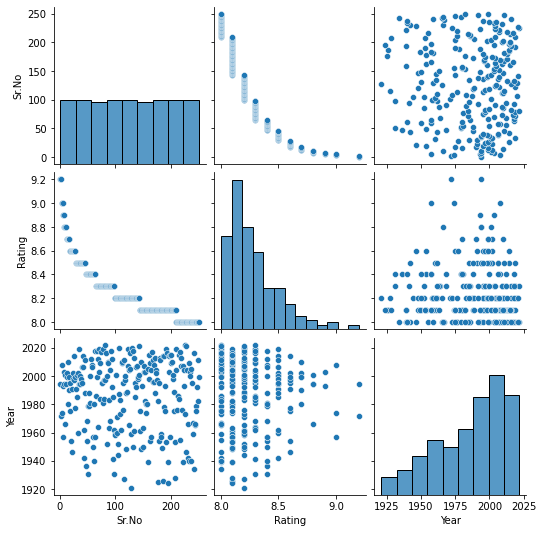

In [18]:
plt.figure(figsize=(10,10))
ax=sb.pairplot(df5)
plt.show()


###Scattering of Year vs Rating

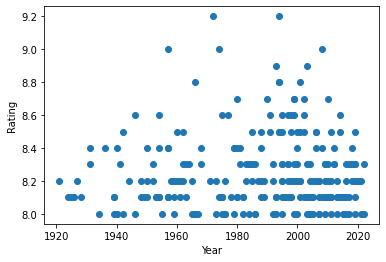

In [19]:
plt.scatter(data=df5,x='Year',y='Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


###Jointplot of Rating vs Year

<Figure size 720x504 with 0 Axes>

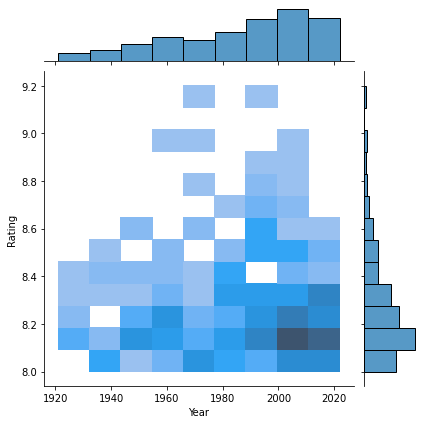

In [20]:
plt.figure(figsize=(10,7))
sb.jointplot(data=df5,x='Year',y='Rating',kind='hist')
plt.show()


###Heat Maps Year vs Rating

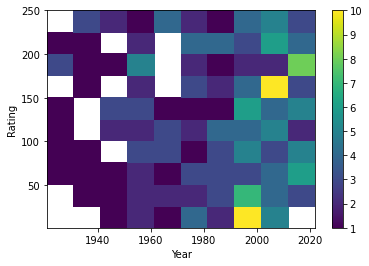

In [21]:
plt.hist2d(data=df5,x='Year',y='Sr.No',cmin=0.5)
plt.colorbar()
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()
